In [240]:
import numpy as np
from numpy import random
from scipy import optimize

In [241]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [242]:
x = linspace(0, 30, 500)
y = [i/2 + 1 + random.normal(0, 0.2) for i in x]

sample = list(zip(x, y))

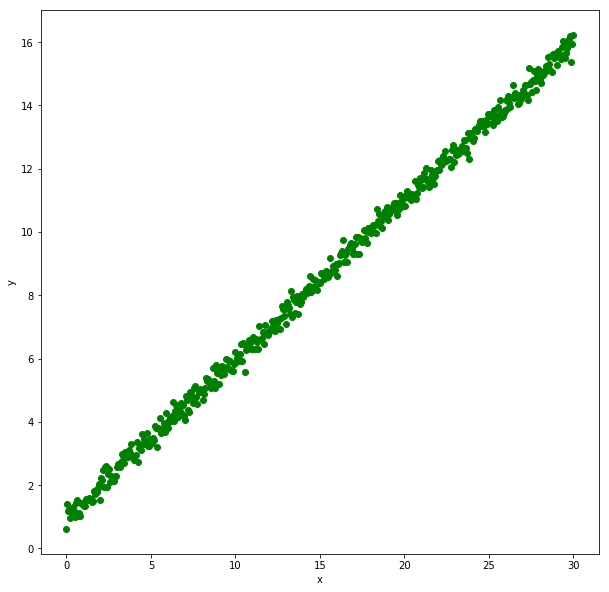

In [243]:
figure(figsize(10, 10))
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x, y, color = 'g')

In [249]:
def mse(param, args):
    size = len(args)
    return (sum([((param[0]*args[i][0] + param[1] - args[i][1])**2) for i in range(size)])/size)

In [250]:
def mae(param, args):
    size = len(args)
    return (sum([abs(param[0]*args[i][0] + param[1] - args[i][1]) for i in range(size)])/size)

In [251]:
x_0 = [0, 0]
mse_min_res = sp.optimize.minimize(mse, x_0, args = sample)

In [252]:
mse_min_res

      fun: 0.040249597478368426
 hess_inv: array([[ 0.00663733, -0.09959607],
       [-0.09959607,  1.99400375]])
      jac: array([ -2.03028321e-07,  -1.02445483e-08])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 0.50037924,  0.99345171])

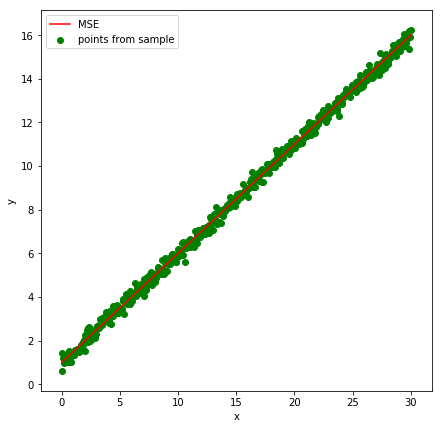

In [253]:
figure(figsize(7, 7))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, x*mse_min_res.x[0] + mse_min_res.x[1], 'r', label = 'MSE')
plt.scatter(x, y, color = 'g', label = 'points from sample')
plt.legend()
plt.show()

In [259]:
new_x = linspace(0, 30, 75)
new_y = [-1 + random.normal(0, 0.2) for i in x]
sample = np.concatenate((sample, list(zip(new_x, new_y))), axis = 0)

In [255]:
mse_min_res = sp.optimize.minimize(mse, x_0, args = sample)
mae_min_res = sp.optimize.minimize(mae, x_0, args = sample)

In [256]:
mae_min_res

      fun: 1.3741226989957955
 hess_inv: array([[  3.36672142e-05,  -1.93507883e-05],
       [ -1.93507883e-05,   1.54746865e-05]])
      jac: array([ 0.01254432,  0.00173913])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 836
      nit: 18
     njev: 206
   status: 2
  success: False
        x: array([ 0.50156283,  0.94023548])

In [257]:
mse_min_res

      fun: 12.407787651546995
 hess_inv: array([[ 0.00662026, -0.09930392],
       [-0.09930392,  1.98955935]])
      jac: array([  1.19209290e-07,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.43411336,  0.75009384])

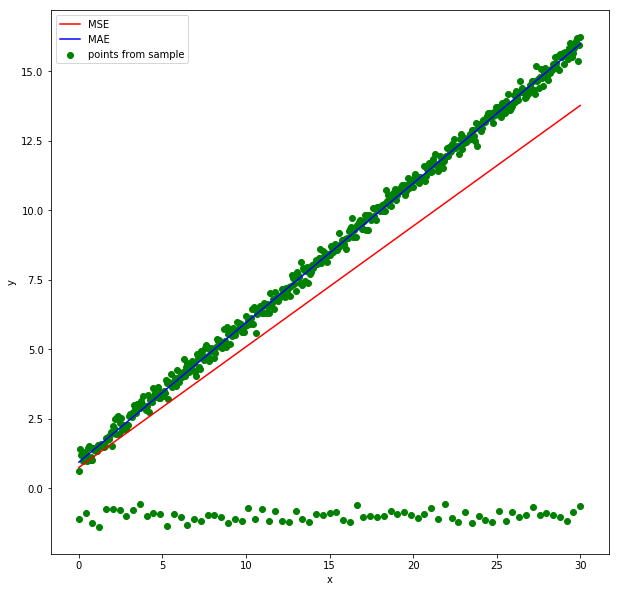

In [265]:
figure(figsize(10, 10))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, x*mse_min_res.x[0] + mse_min_res.x[1], 'r', label = 'MSE')
plt.plot(x, x*mae_min_res.x[0] + mae_min_res.x[1], 'b', label = 'MAE')
plt.scatter([sample[i][0] for i in range(575)], [sample[i][1] for i in range(575)], color = 'g', label = 'points from sample')
plt.legend()
plt.show()

Из графика можно сделать вывод, что MAE является более устойчивым к выбросам, чем MSE.